# Credit Card Fraud Detection
Detecting fraudulent credit card transactions based on transactions that were made by credit cards.
The dataset is coming from kaggle: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?datasetId=310&sortBy=voteCount&select=creditcard.csv and contains transactions made by credit cards in September 2013 by European cardholders

- This dataset contains numercial input variables from PCA transformation.
- All the original features and background information are not revealed due to confidentiality issues
- From PCA, obtained features of V1 - V28 with Time, Amount and Class added additionally for the details 
- Class: 1 = Fraud, 0 = Normal Transactions

### Objectives:
- Credit Card company to be able to use model to prevent fraud transactions prior to the actual transaction to be happen. Thus, before suspicious transaction to be made, they can send message or call cardholder for checking.
- Credit Card company to understand features that impacts detecting fraud transactions and detect patterns to distinguish between normal vs fraud transactions
- By able to do above things to prevent the fraud transaction to be occur, they can save lot of money and time catching fraud transactions and find the 'loss' money

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from mlxtend.plotting import plot_learning_curves

from mlxtend.plotting import plot_learning_curves
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)
data =pd.read_csv('/Users/maxkim/Desktop/DS Camp/Mini Project/Capstone Project/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Check structure of dataframe

In [3]:
data.info() # All data are float as V1 - V28 are PCA transformed data
            # 31 columns with 284K rows of transaction data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
pd.set_option("display.float", "{:.2f}".format)
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,1.09,1.02,1.00,1.00,0.96,0.92,0.88,0.85,0.84,0.81,0.77,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,-24.59,-4.80,-18.68,-5.79,-19.21,-4.50,-14.13,-25.16,-9.50,-7.21,-54.50,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,-0.54,-0.76,-0.41,-0.65,-0.43,-0.58,-0.47,-0.48,-0.50,-0.46,-0.21,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,-0.09,-0.03,0.14,-0.01,0.05,0.05,0.07,-0.07,-0.00,0.00,-0.06,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,0.45,0.74,0.62,0.66,0.49,0.65,0.52,0.40,0.50,0.46,0.13,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,23.75,12.02,7.85,7.13,10.53,8.88,17.32,9.25,5.04,5.59,39.42,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


In [5]:
# Any missing values within the dataframe
data.isnull().sum() # No null values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

- Since it was already PCA transformed, there were not any NaN values within the dataframe and it is well-structured

### EDA
#### 3 Columns that are not transformed prior:
- Time (seconds elapsed between each transaction and the first transaction in the dataset)
- Amount
- Class (1 =Fraud, 0 =Non-Fraud)

##### Class

In [6]:
# Class distribution
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

non-Fraud transactions: 99.83%
Fraud transactions: 0.17%


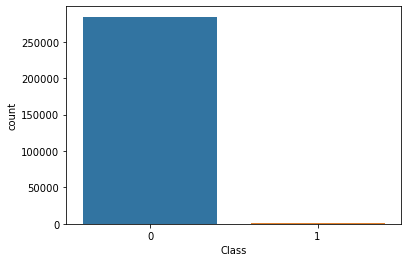

In [7]:
# Looking at distribution between 1 (fraud) vs 0 (normal) by % & graph
sns.countplot(x ='Class', data=data)
print('non-Fraud transactions: {}%'.format(round(data.Class.value_counts()[0]/len(data)*100.0,2)))
print('Fraud transactions: {}%'.format(round(data.Class.value_counts()[1]/len(data)*100.0,2)))

- This dataset is very imbalanced dataset: 99.8% vs 0.2%.
- So when we predict all transaction to be normal transactions, we will have a model that has 99.8% of accuracy. Thus, what is more important is to look at Type 1 & 2 error. In this case, false negative is more significant than false positive.
    - False Negative: Indicates that it is not a fraud transaction but actually it was fraud transactions
    - False Positive: Indicates that it is a fraud transaction but actually it was normal transactions
- From credit card company's perspective, in order to save their money and time and prevent fraud to be occur, it is more important to have low false negative rate.

- Recall of fraud cases (sensitivity) summarizes true positive rate (True positive/True positive + False Negative) - how many cases we got correct out of all the positive ones
- Recall of non-fraud (specificity) summarizes true negative rate (True negative/True negative + False positive) - how many cases we got correct out of all the negative ones
- Precision of fraud cases (True positive/True positive + False positive) summarizes the accuracy of fraud cases detected - out of all predicted as fraud, how many are correct
- Precision of non-fraud cases (True negative/True negative + False negative) summarizes the accuracy of non-fraud cases detected - out of all predicted as non-fraud, how many are correct
- F1-score is the harmonic mean of recall and precision

##### Amount & Time

In [8]:
# Check Amount difference based on transaction class
fraud0 = data[data['Class'] == 0]
fraud1 = data[data['Class'] == 1]

amt_desc = pd.concat([fraud0['Amount'].describe(), fraud1['Amount'].describe()], axis=1)
amt_desc.columns = ['non-fraud','fraud']
amt_desc

,non-fraud,fraud
count,284315.00,492.00
mean,88.29,122.21
std,250.11,256.68
min,0.00,0.00
25%,5.65,1.00
50%,22.00,9.25
75%,77.05,105.89
max,25691.16,2125.87


- The average amount for fraud transaction is relatively higher than non-fraud (122.21 vs 88.29). However, in the 50% quantile mark, non-fraud shows much higher value (22.00 vs 9.25). This indicates that there may be relation between amount and fraud transaction, but this can be happen due to skewed amount data for fraud transactions

In [9]:
# Check time difference based on transaction class
time_desc = pd.concat([fraud0['Time'].describe(), fraud1['Time'].describe()], axis=1)
time_desc.columns = ['non-fraud','fraud']
time_desc

,non-fraud,fraud
count,284315.00,492.00
mean,94838.20,80746.81
std,47484.02,47835.37
min,0.00,406.00
25%,54230.00,41241.50
50%,84711.00,75568.50
75%,139333.00,128483.00
max,172792.00,170348.00


<AxesSubplot:title={'center':'Amount Distribution'}, xlabel='Amount', ylabel='Density'>

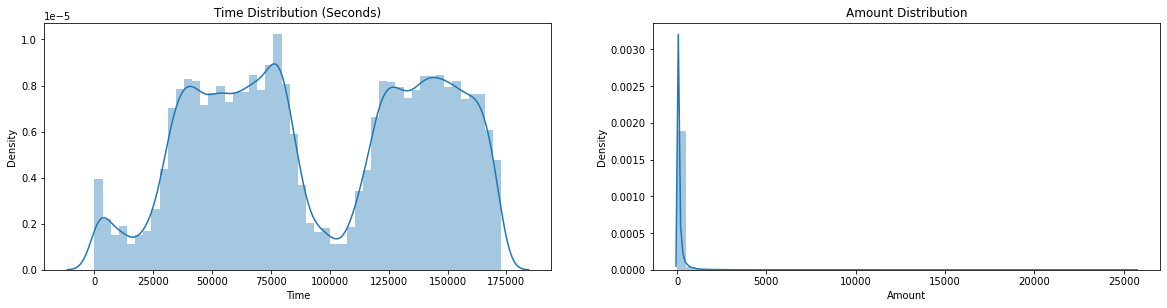

In [10]:
plt.figure(figsize=(20,10))

plt.subplot(2, 2, 1)
plt.title('Time Distribution (Seconds)')

sns.distplot(data['Time'])

#plot the amount feature
plt.subplot(2, 2, 2)
plt.title('Amount Distribution')
sns.distplot(data['Amount'])

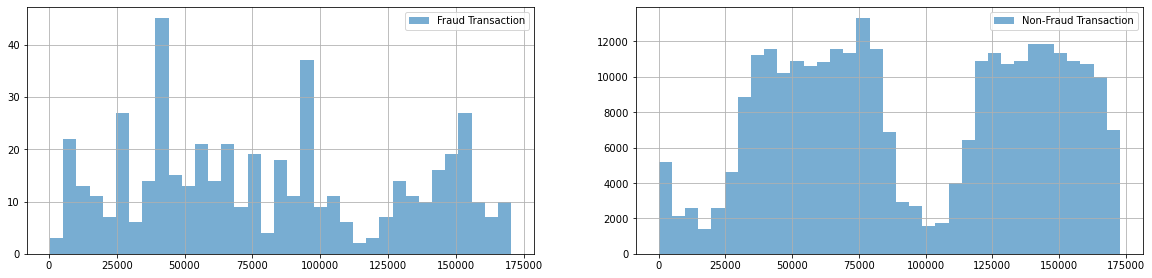

In [11]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
data[data.Class == 1].Time.hist(bins=35, alpha=0.6, label="Fraud Transaction")
plt.legend()

plt.subplot(2, 2, 2)
data[data.Class == 0].Time.hist(bins=35, alpha=0.6, label="Non-Fraud Transaction")
plt.legend()

In [12]:
# Time is shown as seconds. Convert it to hour and see the amount details by hour
data['Hour'] = data['Time'].apply(lambda x: np.floor(x / 3600))

tmp = data.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
df = pd.DataFrame(tmp)
df.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
df.head(10)

,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.00,0,0.00,7712.43,3961,256572.87,64.77,12.99,45615.82
1,0.00,1,0.00,529.00,2,529.00,264.50,264.50,139920.50
2,1.00,0,0.00,1769.69,2215,145806.76,65.83,22.82,20053.62
3,1.00,1,59.00,239.93,2,298.93,149.47,149.47,16367.83
4,2.00,0,0.00,4002.88,1555,106989.39,68.80,17.90,45355.43
5,2.00,1,1.00,1809.68,21,1829.78,87.13,1.00,155776.44
6,3.00,0,0.00,1903.26,1808,94086.79,52.04,15.95,16741.79
7,3.00,1,0.00,179.66,13,220.05,16.93,1.00,2457.21
8,4.00,0,0.00,2126.13,1076,79050.36,73.47,15.95,24416.86
9,4.00,1,1.00,766.36,6,790.26,131.71,3.86,96679.48


<AxesSubplot:title={'center':'Time Distribution (Hour)'}, xlabel='Hour', ylabel='Density'>

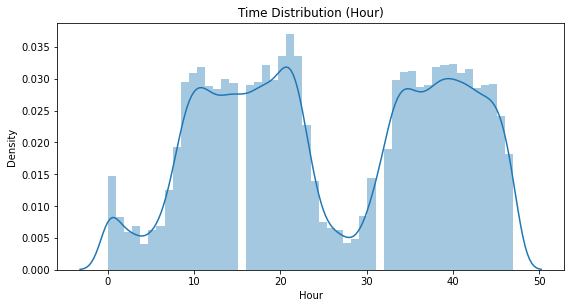

In [13]:
plt.figure(figsize=(20,10))

plt.subplot(2, 2, 1)
plt.title('Time Distribution (Hour)')

sns.distplot(data['Hour'])

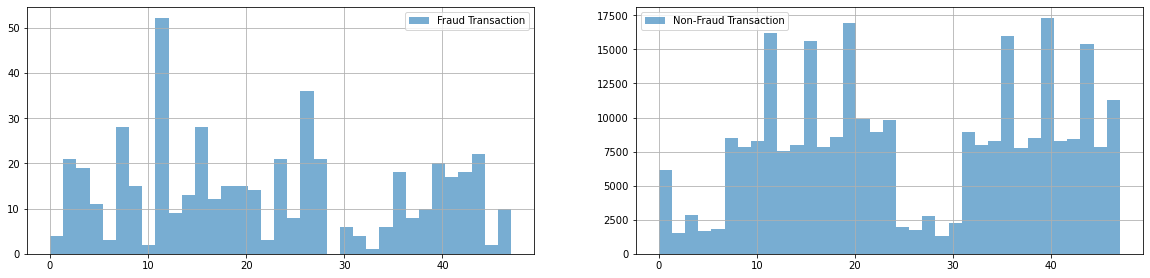

In [42]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
data[data.Class == 1].Hour.hist(bins=35, alpha=0.6, label="Fraud Transaction")
plt.legend()

plt.subplot(2, 2, 2)
data[data.Class == 0].Hour.hist(bins=35, alpha=0.6, label="Non-Fraud Transaction")
plt.legend()

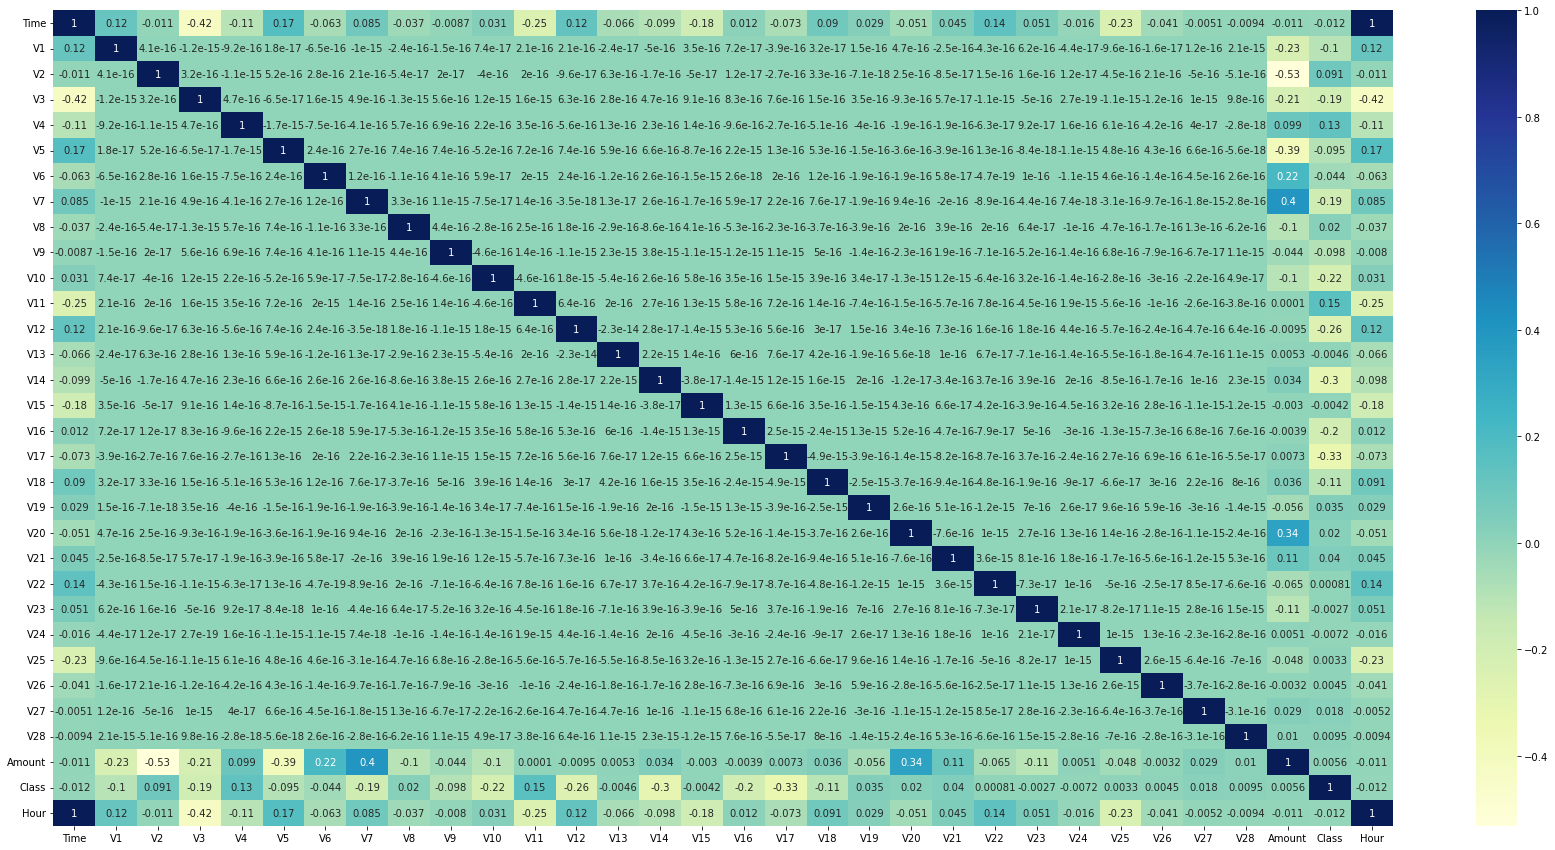

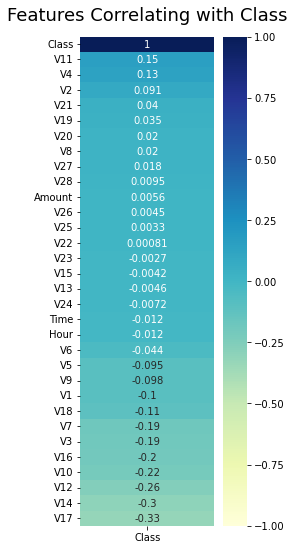

In [14]:
# Data Correlation
corr =data.corr()
plt.figure(figsize =(30, 15))
sns.heatmap(corr, annot =True, cmap="YlGnBu")

# Correlating with target variable
plt.figure(figsize=(3, 9))
heatmap = sns.heatmap(corr[['Class']].sort_values(by='Class', ascending=False), vmin=-1, vmax=1, annot=True, cmap='YlGnBu')
heatmap.set_title('Features Correlating with Class', fontdict={'fontsize':18}, pad=16);

- As we can see from the correlation matrix, class does not highly correlated with Time and Amount. 

<Figure size 432x288 with 0 Axes>

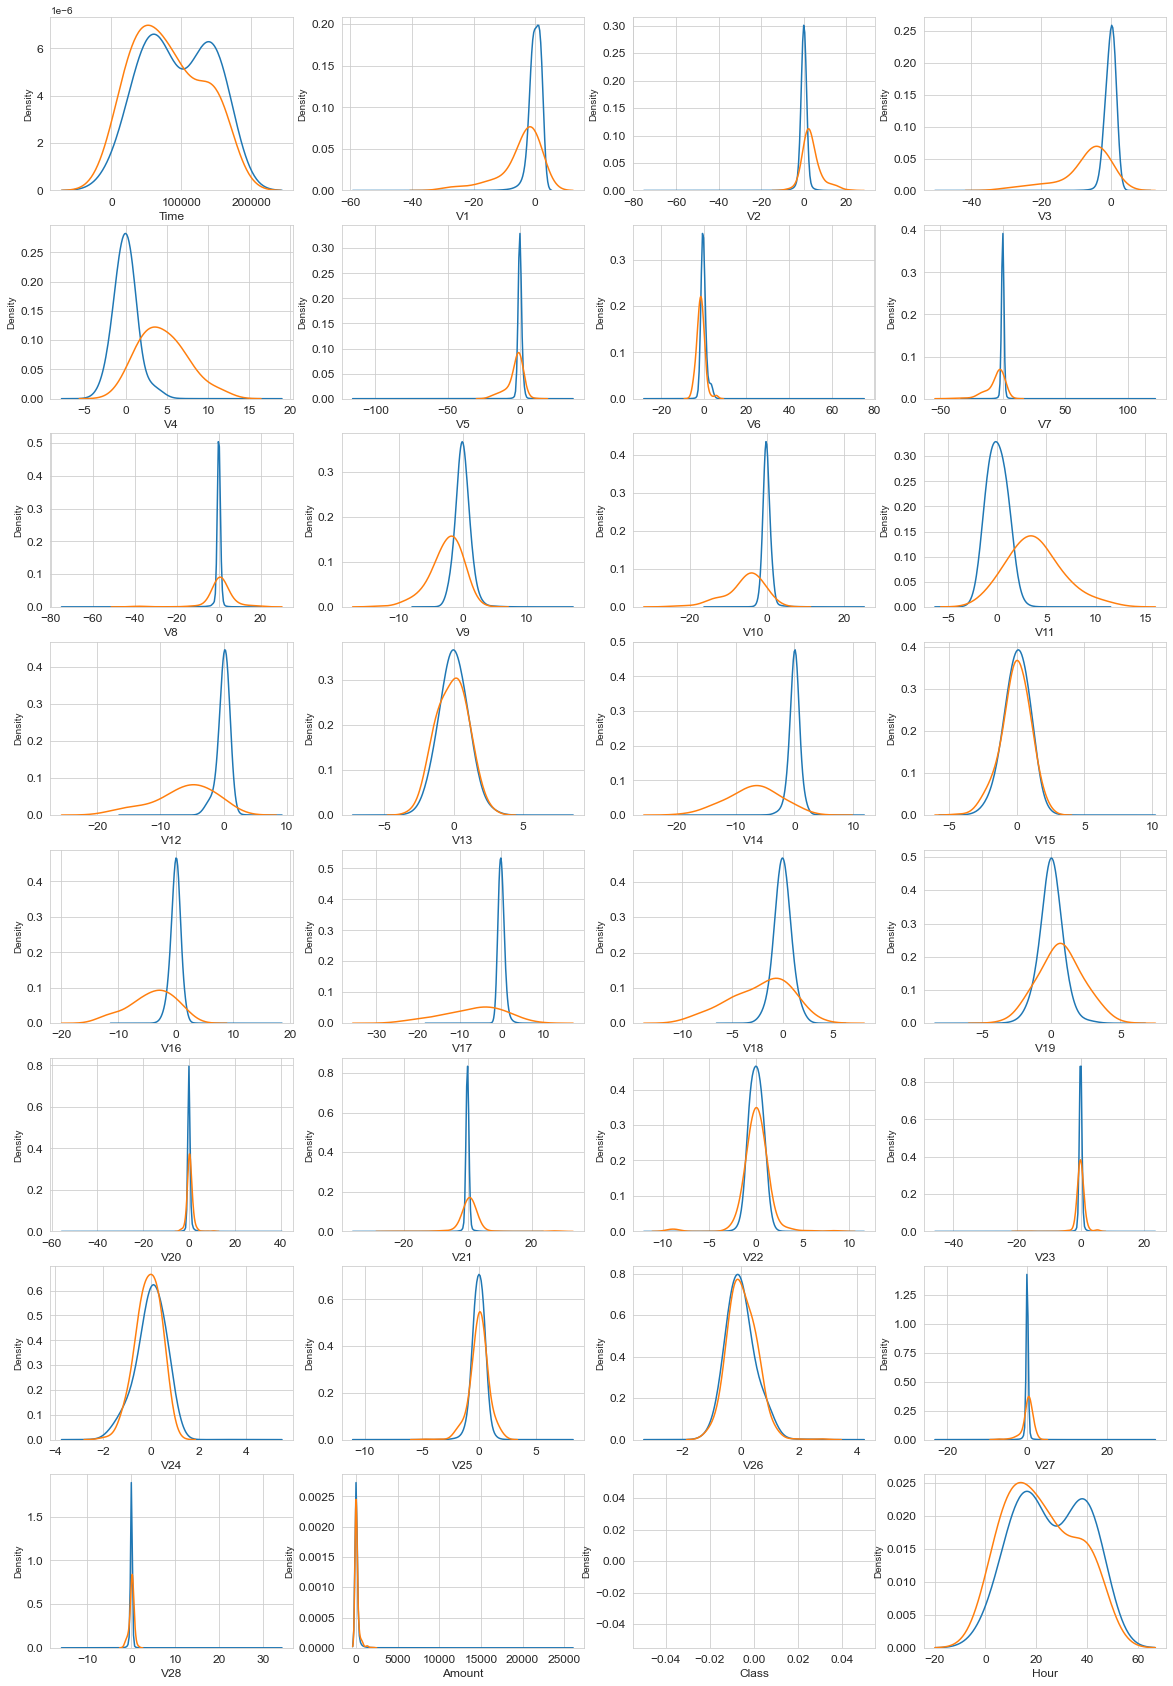

In [46]:
var = data.columns.values

i = 0
t0 = data.loc[data['Class'] == 0]
t1 = data.loc[data['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(20,))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

In [15]:
X = data.drop('Class', axis=1)
y = data.Class

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size =0.2, random_state =1)

In [33]:
# Scale since Time and Amount and Hour needs to be scaled as well
sc = StandardScaler()
X_train = sc.fit_transform(X_train)                 
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = sc.transform(X_test)
X_test = pd.DataFrame(X_test, columns=X.columns)


X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Hour
0,-1.50,0.71,-0.33,0.05,-0.52,-0.38,-0.02,-0.56,-0.04,0.35,0.45,0.97,-2.75,1.32,1.88,-0.32,-0.72,0.04,2.51,-0.29,-0.61,-0.89,-1.80,-0.02,-1.51,0.31,1.91,-0.24,-0.05,-0.23,-1.51
1,-1.23,0.52,-0.12,0.80,1.23,-0.48,0.47,-0.35,0.19,1.02,-0.42,-0.94,1.44,0.61,-0.94,-1.96,-1.35,0.85,-1.73,0.19,-0.12,-0.52,-0.91,0.08,0.18,0.85,-1.07,0.22,0.10,-0.19,-1.20
2,-0.72,-0.58,0.38,1.62,0.93,0.44,0.11,0.19,0.31,-1.19,0.05,1.23,0.47,-0.09,0.18,-0.44,1.11,-1.10,0.17,-2.46,-0.05,0.45,0.94,-0.19,0.34,0.07,-0.19,0.14,0.30,-0.26,-0.75
3,-1.84,-0.43,0.04,0.93,-1.18,0.33,-0.11,0.32,0.17,1.79,-1.52,-0.94,-3.89,-1.13,1.65,-1.59,0.51,0.42,-0.64,-1.54,-0.39,-0.54,-1.51,0.04,-1.39,-0.58,1.93,-0.22,0.23,-0.17,-1.81
4,0.43,-0.02,0.33,0.55,-0.36,0.09,-0.08,0.02,0.19,0.58,-1.05,-0.91,-0.56,-0.52,-1.50,0.54,1.14,0.21,0.89,-0.87,-0.16,0.14,0.49,0.29,0.94,-2.85,0.31,0.62,0.86,-0.31,0.39


In [34]:
X_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Hour
0,0.53,-0.31,-0.47,-0.10,-0.16,1.47,-1.51,0.23,-0.43,0.33,0.06,-0.84,0.55,0.62,-0.11,-0.66,-0.33,-0.71,-1.07,-0.25,-0.25,-0.10,0.06,0.62,0.04,-4.26,-0.42,0.16,0.66,-0.35,0.54
1,-0.35,-0.41,0.80,0.88,0.02,-0.21,-0.49,0.26,0.36,-0.64,-0.55,0.09,0.71,0.78,0.37,1.04,-0.12,0.15,-1.15,-0.59,-0.01,-0.17,-0.51,0.15,0.66,-0.50,0.17,0.40,0.17,-0.35,-0.37
2,-0.26,-0.16,0.68,0.64,-0.09,0.41,-0.40,0.57,-0.05,-0.42,-0.48,-0.80,0.11,1.14,-0.67,0.94,0.67,-0.40,0.03,0.27,0.27,-0.41,-1.07,-0.20,-0.82,-0.03,0.25,0.61,0.27,-0.35,-0.29
3,-1.33,-0.68,0.62,1.17,-1.11,-0.09,-0.34,0.55,-0.03,0.35,0.31,0.89,-0.28,-1.34,-0.01,0.23,0.88,-1.18,0.43,-0.15,0.41,-0.30,-0.58,-0.39,0.02,0.45,1.69,0.24,-0.01,-0.29,-1.36
4,-0.29,0.65,0.37,-0.38,0.62,0.04,-1.10,0.30,-0.24,-0.08,-0.64,0.10,-0.43,-0.64,-1.23,1.12,0.66,1.26,0.40,-0.45,-0.14,-0.22,-0.59,-0.12,0.43,1.06,0.77,-0.08,0.12,-0.35,-0.29


In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(227845, 31)
(56962, 31)
(227845,)
(56962,)


### Baseline Modelling
- Logistic Regression
- KNN
- Random Forest
- XGB
- AdA

In [19]:
def show_summary_report(actual, prediction, probabilities, model_name):

    if isinstance(actual, pd.Series):
        actual = actual.values.astype(int)
    prediction = prediction.astype(int)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_score(actual, prediction))
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_score(actual, prediction))
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_score(actual, prediction))
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_score(actual, probabilities[:, 1]))
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    average_precision = average_precision_score(actual, prediction)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, probabilities[:, 1])
    roc_auc = auc(fpr, tpr)
    
    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')
    ax[2].grid(alpha = 0.5)
    ax[1].grid(alpha = 0.5)

    plt.show

In [20]:
# Logistic Regression
lr =LogisticRegression()
lr.fit(X_train, y_train)
lr_y_pred= lr.predict(X_test)
lr_y_prob= lr.predict_proba(X_test)

In [47]:
lr_train_y_pred= lr.predict(X_train)
lr_train_y_prob= lr.predict_proba(X_train)

Accuracy : 0.9993 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8970 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.6667 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9785                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


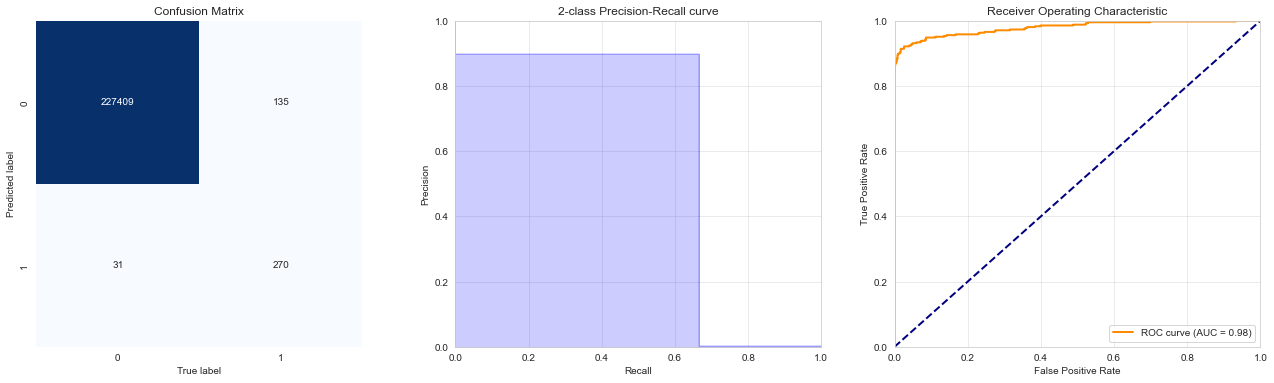

In [48]:
# Logistic Regression with training data
show_summary_report(y_train, lr_train_y_pred, lr_train_y_prob, 'Logistic Regression')

Accuracy : 0.9991 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8276 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.5517 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9610                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


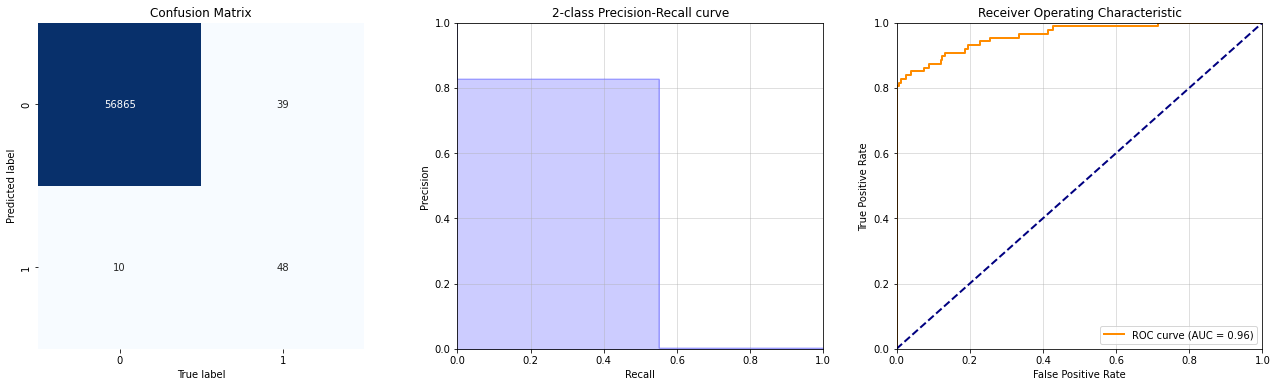

In [21]:
# Logistic Regression with test data
show_summary_report(y_test, lr_y_pred, lr_y_prob, 'Logistic Regression')

Accuracy : 0.9996 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9563 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8099 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9999                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


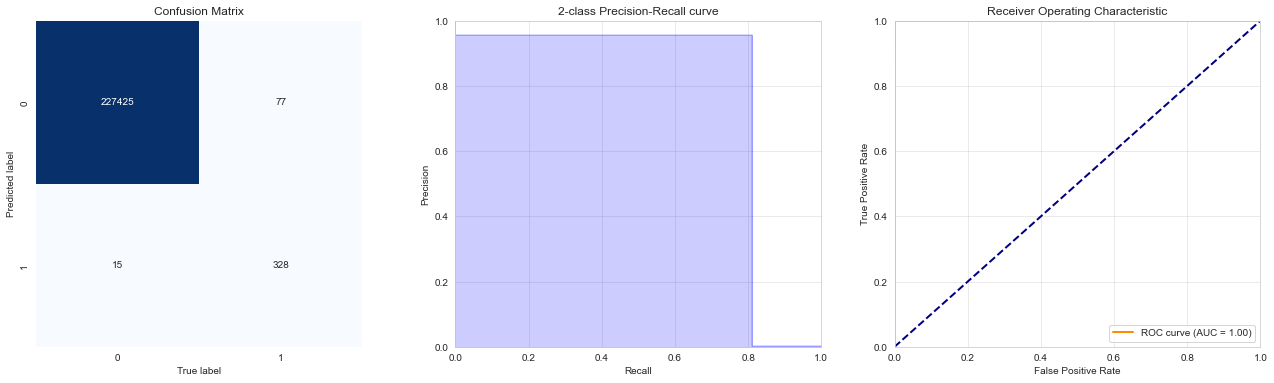

In [49]:
# KNN with train data
knn_train_y_pred =knn.predict(X_train)
knn_train_y_prob =knn.predict_proba(X_train)
show_summary_report(y_train, knn_train_y_pred, knn_train_y_prob, 'KNN (5)')

Accuracy : 0.9994 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9091 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.6897 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9021                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


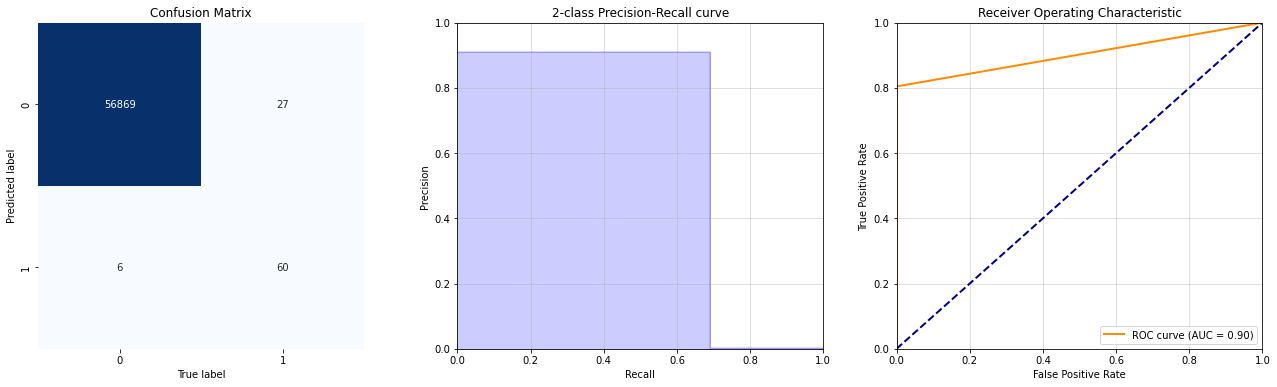

In [22]:
# KNN with test data
knn =KNeighborsClassifier(n_neighbors =5)
knn.fit(X_train, y_train)
knn_y_pred =knn.predict(X_test)
knn_y_prob =knn.predict_proba(X_test)
show_summary_report(y_test, knn_y_pred, knn_y_prob, 'KNN (5)')

In [23]:
# Random Forest
rf =RandomForestClassifier(random_state =42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy : 1.0000 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 1.0000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 1.0000 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 1.0000                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


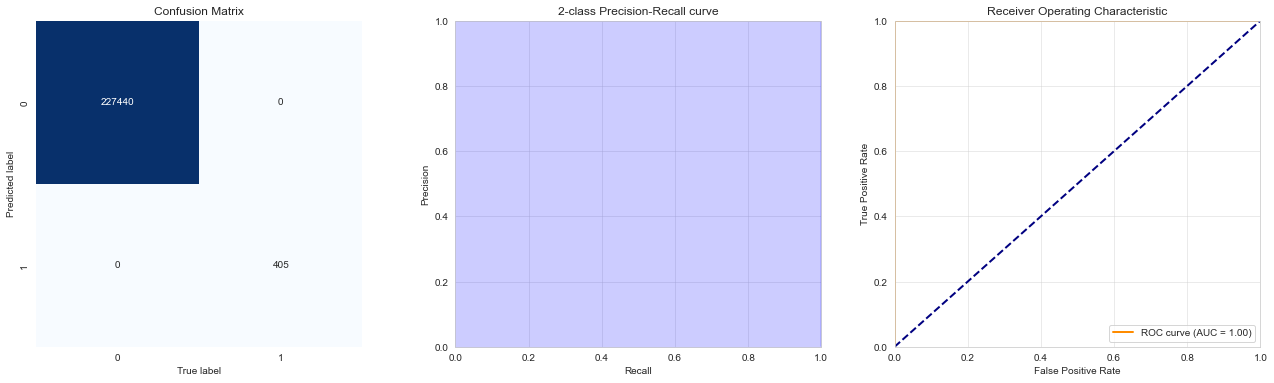

In [50]:
# Random forest with train dataset
rf_train_y_pred =rf.predict(X_train)
rf_train_y_prob =rf.predict_proba(X_train)
show_summary_report(y_train, rf_train_y_pred, rf_train_y_prob, 'Random Forest')

In [24]:
# Random forest with test dataset
rf_y_pred =rf.predict(X_test)
rf_y_prob =rf.predict_proba(X_test)

Accuracy : 0.9995 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9296 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7586 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9463                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


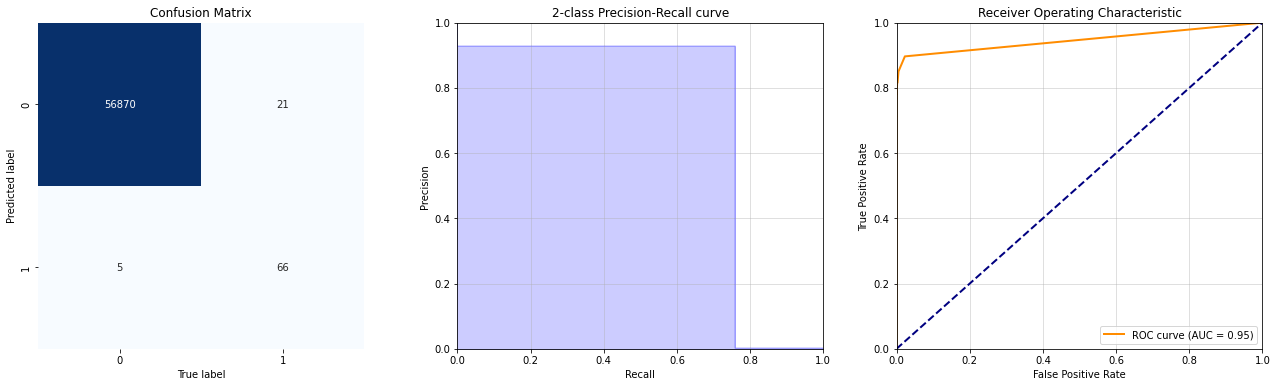

In [25]:
show_summary_report(y_test, rf_y_pred, rf_y_prob, 'Random Forest')

Accuracy : 0.9996 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9577 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7816 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9795                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


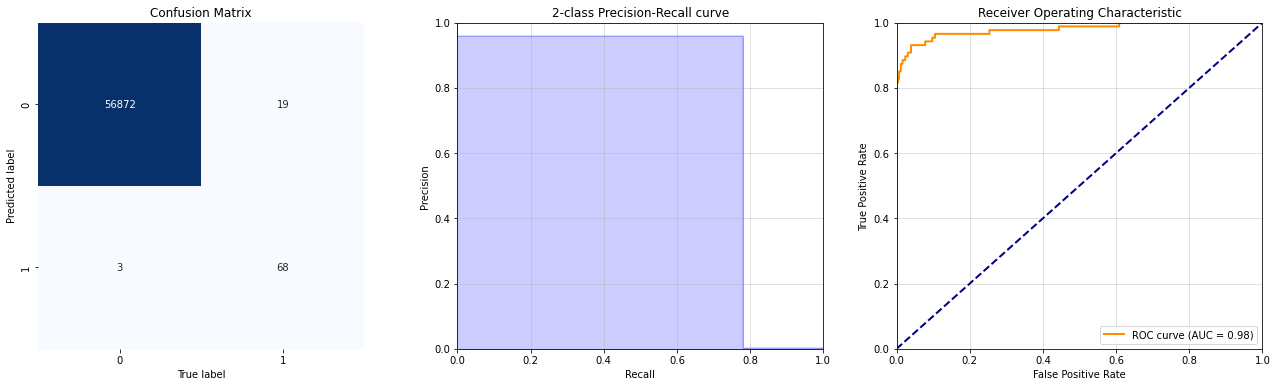

In [40]:
import xgboost as xgb
#XGB with test dataset
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_model_y_pred = xgb_model.predict(X_test)
xgb_model_y_proba = xgb_model.predict_proba(X_test)

show_summary_report(y_test, xgb_model_y_pred, xgb_model_y_proba, 'XGBoost')

Accuracy : 1.0000 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 1.0000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 1.0000 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 1.0000                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


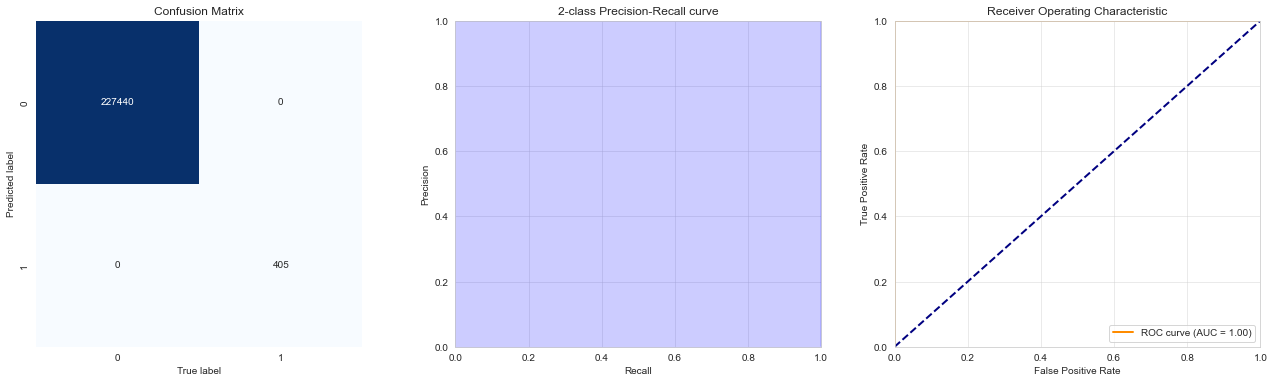

In [51]:
#XGB with train dataset
xgb_train_model_y_pred = xgb_model.predict(X_train)
xgb_train_model_y_proba = xgb_model.predict_proba(X_train)

show_summary_report(y_train, xgb_train_model_y_pred, xgb_train_model_y_proba, 'XGBoost')

Accuracy : 0.9992 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7910 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.6092 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9623                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


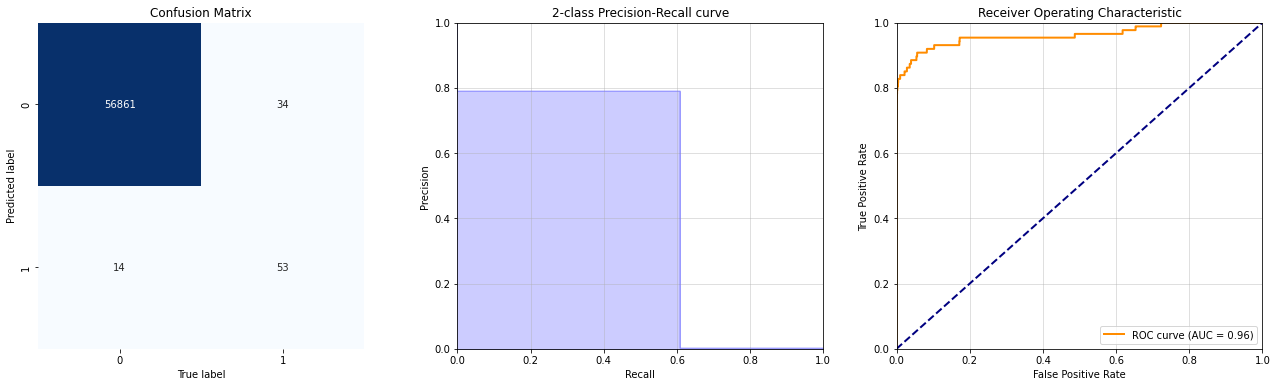

In [41]:
#ada with test dataset
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)
ada_model_y_pred = ada_model.predict(X_test)
ada_model_y_proba = ada_model.predict_proba(X_test)

show_summary_report(y_test, ada_model_y_pred, ada_model_y_proba, 'AdaBoost')

Accuracy : 0.9993 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8501 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7284 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9983                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


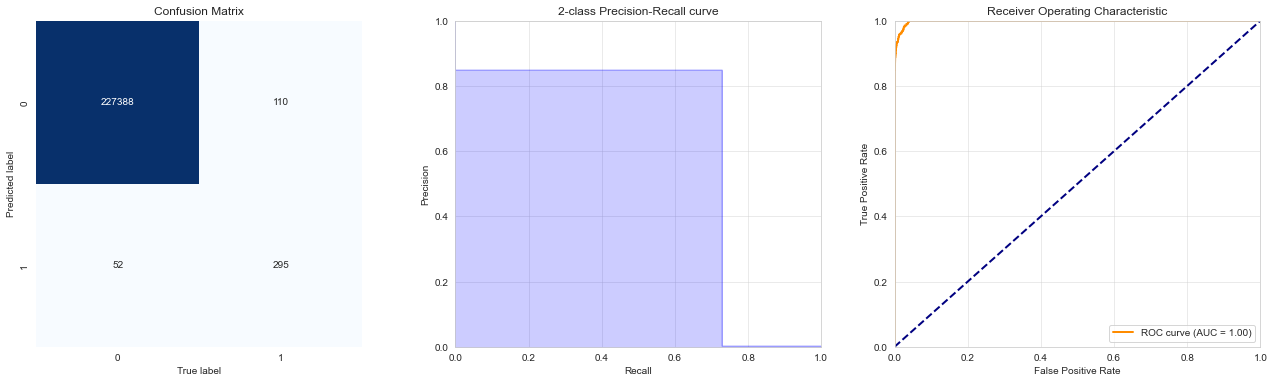

In [52]:
#ada with train dataset
ada_train_model_y_pred = ada_model.predict(X_train)
ada_train_model_y_proba = ada_model.predict_proba(X_train)

show_summary_report(y_train, ada_train_model_y_pred, ada_train_model_y_proba, 'AdaBoost')

In [30]:
data.to_csv('/Users/maxkim/Desktop/DS Camp/Mini Project/Capstone Project/adjusted_data.csv')

In [35]:
X_train.to_csv('/Users/maxkim/Desktop/DS Camp/Mini Project/Capstone Project/X_train.csv')
X_test.to_csv('/Users/maxkim/Desktop/DS Camp/Mini Project/Capstone Project/X_test.csv')
y_train.to_csv('/Users/maxkim/Desktop/DS Camp/Mini Project/Capstone Project/y_train.csv')
y_test.to_csv('/Users/maxkim/Desktop/DS Camp/Mini Project/Capstone Project/y_test.csv')